In [1]:
import pandas as pd

In [2]:
for i in range(40):
    if i==0:
        train = pd.read_pickle('../RIT_julio/SHAP/nuevo11/MultiNLI/TRAIN/TRAIN_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('../RIT_julio/SHAP/nuevo11/MultiNLI/TRAIN/TRAIN_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            print(i+1)

In [3]:
train

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases
0,2,0.333333,0.0,0.000000,1.859071,0.000000,0.666667,0.680414,0.000000,0.000000,...,0.000000,6,0,9,0.611111,0.000000,0,0,0.666667,1
1,2,0.666667,0.0,0.000000,2.149280,0.000000,0.400000,0.298807,0.000000,0.000000,...,0.650022,6,0,18,0.454365,0.000000,0,0,0.333333,0
2,2,1.000000,0.0,1.317931,2.039293,1.360964,0.000000,0.169031,3.756076,0.005873,...,1.459148,6,2,5,0.565079,0.387440,0,0,0.000000,0
3,2,0.500000,0.0,1.216655,2.251629,0.918296,0.333333,0.577350,3.897728,0.008673,...,1.000000,2,1,3,0.527778,1.000000,0,0,0.500000,0
4,2,0.200000,0.0,0.000000,2.122217,0.000000,0.333333,0.596285,0.000000,0.000000,...,0.000000,5,0,13,0.477778,0.000000,0,0,0.800000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2697,2,0.500000,0.0,0.974302,2.311278,1.500000,0.666667,0.500000,3.823113,0.003372,...,0.811278,4,1,4,0.464286,1.061278,0,1,0.500000,2
2698,2,0.750000,0.0,0.000000,1.977029,0.000000,0.750000,0.452911,0.000000,0.000000,...,0.591673,7,0,15,0.000000,0.000000,0,0,0.250000,1
2699,2,0.428571,0.0,1.361192,1.788600,1.339664,0.250000,0.625000,3.818834,0.006092,...,0.954434,8,3,7,0.683333,0.287645,0,0,0.571429,0
2700,2,0.800000,0.0,1.276824,1.798697,1.696214,0.166667,0.176777,3.819869,0.004836,...,0.985228,7,4,16,0.375000,0.037180,0,0,0.200000,1


In [4]:
for i in range(40):
    if i==0:
        temp1 = pd.read_csv('../OPENAI/data/MultiNLI/TRAIN/TRAIN_'+str(i+1)+'.csv')
    else:
        try:
            temp = pd.read_csv('../OPENAI/data/MultiNLI/TRAIN/TRAIN_'+str(i+1)+'.csv')
            temp1=pd.concat([temp1,temp])
        except:
            print(i+1)

In [5]:
temp1

,sentence1,sentence2,gold_label,genre
0,Conceptually cream skimming has two basic dime...,Product and geography are what make cream skim...,1,government
1,you know during the season and i guess at at y...,You lose the things to the following level if ...,0,telephone
2,One of our number will carry out your instruct...,A member of my team will execute your orders w...,0,fiction
3,How do you know? All this is their information...,This information belongs to them.,0,fiction
4,yeah i tell you what though if you go price so...,The tennis shoes have a range of prices.,1,telephone
...,...,...,...,...
2697,"Clearly, California can - and must - do better.",California cannot do any better.,2,government
2698,It was once regarded as the most beautiful str...,So many of the original buildings had been rep...,1,travel
2699,Houseboats are a beautifully preserved traditi...,The tradition of houseboats originated while t...,0,travel
2700,Obituaries fondly recalled his on-air debates ...,The obituaries were beautiful and written in k...,1,slate


In [6]:
train=train.reset_index(drop=True)
temp1=temp1.reset_index(drop=True)

In [7]:
train["clases"]=temp1["gold_label"]
train["sentence_A"]=temp1["sentence1"]
train["sentence_B"]=temp1["sentence2"]

In [8]:
#train["mutinfx"]=train["mutinf"]/train["mutinf_t"]
train["mutinf"]=train["mutinf_t"]-train["mutinf"]
#train["max_infox"]=train["max_info"]/train["max_info_t"]
train["max_info"]=train["max_info_t"]-train["max_info"]
#train["mearts"]=train["mearts"]/train["mearts_t"]
#train["entropiasx"]=train["entropias"]/train["entropia_total"]
train["entropias"]=train["entropia_total"]-train["entropias"]
#train["sumasx"]=train["sumas"]/train["sumas_t"]
train["sumas"]=train["sumas_t"]-train["sumas"]
train["list_m"]=train["list_m"]/train["list_M"]
#train["list_mxx"]=train["list_M"]-train["list_m"]

In [9]:
train

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases,sentence_A,sentence_B
0,2,0.333333,0.0,0.000000,1.859071,1.859071,0.666667,0.680414,4.367289,0.000000,...,0.000000,9,0.611111,0.000000,0,0,0.666667,1,Conceptually cream skimming has two basic dime...,Product and geography are what make cream skim...
1,2,0.666667,0.0,0.000000,2.149280,2.149280,0.400000,0.298807,4.335557,0.000000,...,0.000000,18,0.454365,0.000000,0,0,0.333333,0,you know during the season and i guess at at y...,You lose the things to the following level if ...
2,2,1.000000,0.0,1.317931,2.039293,0.678329,0.000000,0.169031,0.048914,0.005873,...,0.333333,5,0.565079,0.387440,0,0,0.000000,0,One of our number will carry out your instruct...,A member of my team will execute your orders w...
3,2,0.500000,0.0,1.216655,2.251629,1.333333,0.333333,0.577350,0.423387,0.008673,...,0.500000,3,0.527778,1.000000,0,0,0.500000,0,How do you know? All this is their information...,This information belongs to them.
4,2,0.200000,0.0,0.000000,2.122217,2.122217,0.333333,0.596285,4.513545,0.000000,...,0.000000,13,0.477778,0.000000,0,0,0.800000,1,yeah i tell you what though if you go price so...,The tennis shoes have a range of prices.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392697,2,0.500000,0.0,0.974302,2.311278,0.811278,0.666667,0.500000,0.652462,0.003372,...,0.250000,4,0.464286,1.061278,0,1,0.500000,2,"Clearly, California can - and must - do better.",California cannot do any better.
392698,2,0.750000,0.0,0.000000,1.977029,1.977029,0.750000,0.452911,4.455544,0.000000,...,0.000000,15,0.000000,0.000000,0,0,0.250000,1,It was once regarded as the most beautiful str...,So many of the original buildings had been rep...
392699,2,0.428571,0.0,1.361192,1.788600,0.448936,0.250000,0.625000,0.433266,0.006092,...,0.375000,7,0.683333,0.287645,0,0,0.571429,0,Houseboats are a beautifully preserved traditi...,The tradition of houseboats originated while t...
392700,2,0.800000,0.0,1.276824,1.798697,0.102483,0.166667,0.176777,0.131896,0.004836,...,0.571429,16,0.375000,0.037180,0,0,0.200000,1,Obituaries fondly recalled his on-air debates ...,The obituaries were beautiful and written in k...


In [10]:
train=train[['relation', 'no_matcheadas', 'contradiction', 'jaccard', 'simBoW','sumas','mutinf_t','max_info_t',
 'entail','list_comp','list_incomp','Jaro-Winkler_rit','negT','negH','overlap_ent','clases','sentence_A','sentence_B']]

In [11]:
train["clases"].unique()

array([1, 0, 2])

In [ ]:
#0 es entailment
# 1 es neutral
# 2 es contradiction

In [12]:
entail_train=train[train["clases"]==0]
neutral_train=train[train["clases"]==1]
contradiction_train=train[train["clases"]==2]
entail_train

,relation,no_matcheadas,contradiction,jaccard,simBoW,sumas,mutinf_t,max_info_t,entail,list_comp,list_incomp,Jaro-Winkler_rit,negT,negH,overlap_ent,clases,sentence_A,sentence_B
1,2,0.666667,0.0,0.400000,0.298807,0.108870,4.335557,0.718266,0.833333,2,0,0.454365,0,0,0.333333,0,you know during the season and i guess at at y...,You lose the things to the following level if ...
2,2,1.000000,0.0,0.000000,0.169031,0.039994,3.804990,0.215116,0.500000,3,0,0.565079,0,0,0.000000,0,One of our number will carry out your instruct...,A member of my team will execute your orders w...
3,2,0.500000,0.0,0.333333,0.577350,0.131803,4.321115,0.629919,0.500000,0,0,0.527778,0,0,0.500000,0,How do you know? All this is their information...,This information belongs to them.
5,2,0.428571,0.0,0.750000,0.857143,0.185132,4.609140,0.952308,1.000000,1,0,0.821429,0,0,0.571429,0,my walkman broke so i'm upset now i just have ...,I'm upset that my walkman broke and now I have...
7,2,0.166667,0.0,0.250000,0.632456,0.168034,4.457088,0.721806,1.000000,2,0,0.766667,0,0,0.833333,0,(Read for Slate 's take on Jackson's findings.),Slate had an opinion on Jackson's findings.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392686,2,0.111111,0.0,0.750000,0.789352,0.151377,4.537524,0.902416,1.000000,1,0,0.864103,0,0,0.888889,0,Dolly Parton's breast implants against Mark Mc...,Dolly Parton's breast implants contrasting Mar...
392687,1,0.000000,0.0,0.666667,0.733799,0.112010,4.500951,1.000000,1.000000,0,0,0.772894,0,0,1.000000,0,The New Radicals sound like Todd Rundgren has ...,The New Radicals sound like Todd Rundgren.
392691,2,0.714286,0.0,0.000000,0.125988,0.046935,3.846935,0.412646,0.666667,4,0,0.419312,0,0,0.285714,0,If you would like to scale the highest heights...,Some lessons and advice are a good idea if you...
392695,2,0.500000,0.0,0.666667,0.666667,0.591318,4.704660,1.000000,1.000000,0,0,0.777778,0,0,0.500000,0,Drawing a blank?,You can be drawing a blank.


In [13]:
entail_train.describe()

,relation,no_matcheadas,contradiction,jaccard,simBoW,sumas,mutinf_t,max_info_t,entail,list_comp,list_incomp,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
count,130899.000000,130899.000000,130899.000000,130899.000000,130899.000000,130899.000000,1.308990e+05,130899.000000,130899.000000,130899.000000,130899.000000,130899.000000,130899.000000,130899.000000,130899.000000,130899.0
mean,1.686942,0.432563,0.018177,0.488967,0.526930,0.151032,4.271893e+00,0.761890,0.838322,0.956524,0.023331,0.552681,0.162392,0.119795,0.532471,0.0
std,0.759957,0.288223,0.088763,0.291670,0.220435,0.134615,4.369490e-01,0.191626,0.207177,1.049922,0.155834,0.230364,0.368812,0.324722,0.292332,0.0
min,-1.000000,0.000000,0.000000,0.000000,0.000000,-0.216746,6.286330e-13,-0.105814,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,2.000000,0.250000,0.000000,0.333333,0.377964,0.069322,4.112125e+00,0.646010,0.750000,0.000000,0.000000,0.450000,0.000000,0.000000,0.333333,0.0
50%,2.000000,0.400000,0.000000,0.500000,0.524142,0.124877,4.369195e+00,0.787012,0.900000,1.000000,0.000000,0.567460,0.000000,0.000000,0.500000,0.0
75%,2.000000,0.625000,0.000000,0.666667,0.676123,0.191031,4.559546e+00,0.909091,1.000000,1.000000,0.000000,0.702564,0.000000,0.000000,0.750000,0.0
max,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,4.986858e+00,1.000000,1.000000,12.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [14]:
def sample_std_mean(df_,n):
    columnas=['relation', 'no_matcheadas', 'contradiction', 'jaccard', 'simBoW','sumas', 'mutinf_t', 'max_info_t',
              'entail', 'list_comp', 'list_incomp','Jaro-Winkler_rit', 'negT', 'negH', 'overlap_ent']
    new_sample=pd.DataFrame()
    i=0
    while i<n: 
        s=df_.sample(1)
        bandera=True
        for s_ in columnas:
            if((s[s_].values[0]<(df_.describe().at["mean",s_]-df_.describe().at["std",s_])) | (s[s_].values[0]>(df_.describe().at["mean",s_]+df_.describe().at["std",s_]))):
                bandera=False
                break
        if(bandera):
            new_sample=pd.concat([new_sample,s])
            i+=1
    return new_sample

In [15]:
entail_final=sample_std_mean(entail_train,50)
neutral_final=sample_std_mean(neutral_train,50)
contradiction_final=sample_std_mean(contradiction_train,50)

In [16]:
entail_final.to_csv("predictions/fewshots/MultiNLI/entails.csv")
neutral_final.to_csv("predictions/fewshots/MultiNLI/neutrals.csv")
contradiction_final.to_csv("predictions/fewshots/MultiNLI/contradictions.csv")

In [17]:
entail_train.describe()

,relation,no_matcheadas,contradiction,jaccard,simBoW,sumas,mutinf_t,max_info_t,entail,list_comp,list_incomp,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
count,130899.000000,130899.000000,130899.000000,130899.000000,130899.000000,130899.000000,1.308990e+05,130899.000000,130899.000000,130899.000000,130899.000000,130899.000000,130899.000000,130899.000000,130899.000000,130899.0
mean,1.686942,0.432563,0.018177,0.488967,0.526930,0.151032,4.271893e+00,0.761890,0.838322,0.956524,0.023331,0.552681,0.162392,0.119795,0.532471,0.0
std,0.759957,0.288223,0.088763,0.291670,0.220435,0.134615,4.369490e-01,0.191626,0.207177,1.049922,0.155834,0.230364,0.368812,0.324722,0.292332,0.0
min,-1.000000,0.000000,0.000000,0.000000,0.000000,-0.216746,6.286330e-13,-0.105814,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,2.000000,0.250000,0.000000,0.333333,0.377964,0.069322,4.112125e+00,0.646010,0.750000,0.000000,0.000000,0.450000,0.000000,0.000000,0.333333,0.0
50%,2.000000,0.400000,0.000000,0.500000,0.524142,0.124877,4.369195e+00,0.787012,0.900000,1.000000,0.000000,0.567460,0.000000,0.000000,0.500000,0.0
75%,2.000000,0.625000,0.000000,0.666667,0.676123,0.191031,4.559546e+00,0.909091,1.000000,1.000000,0.000000,0.702564,0.000000,0.000000,0.750000,0.0
max,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,4.986858e+00,1.000000,1.000000,12.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.0


# graficas

In [23]:
from statsmodels.distributions.empirical_distribution import ECDF

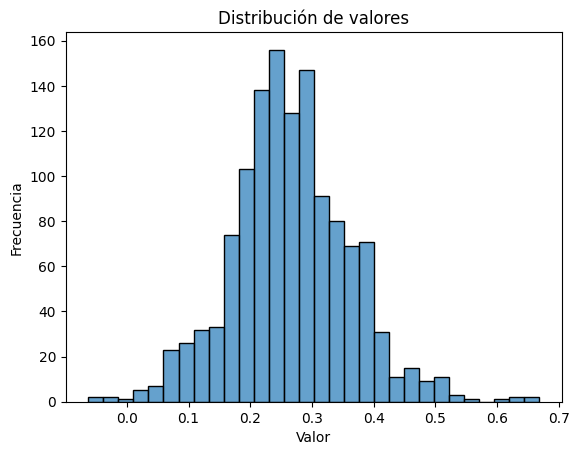

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Graficar la distribución de la columna 'values' utilizando un histograma con seaborn
sns.histplot(entail_train['sumas'],bins=30,  color="#3182bd")

# Agregar título y etiquetas
plt.title('Distribución de valores')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.show()

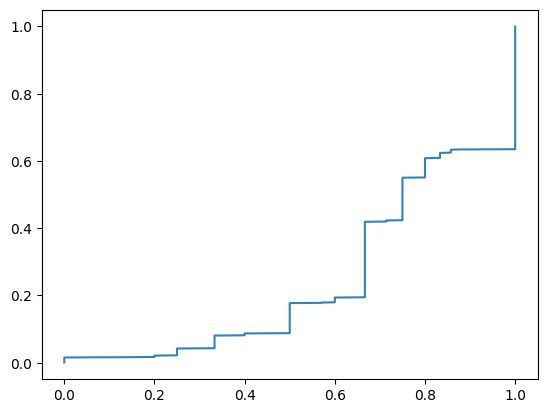

In [28]:
ecdf = ECDF(x=entail_train["jaccard"])
plt.plot(ecdf.x, ecdf.y, color="#3182bd")

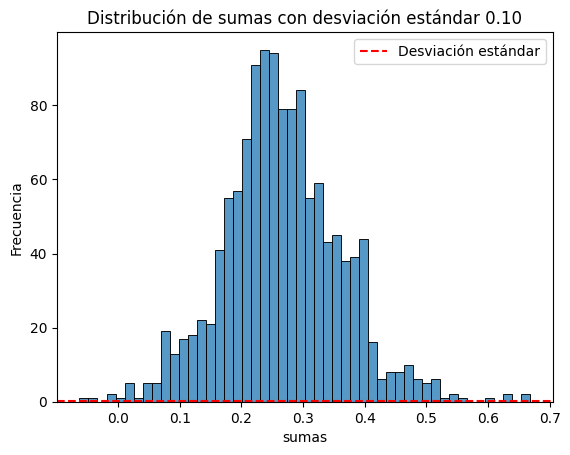

In [35]:
std_dev = entail_train["sumas"].std()
sns.histplot(entail_train["sumas"],  bins=50)
plt.axhline(y=std_dev, color='red', linestyle='--', label='Desviación estándar')
plt.title(f'Distribución de {"sumas"} con desviación estándar {std_dev:.2f}')
plt.xlabel("sumas")
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [36]:
print(std_dev)

0.09533693106481896
